# Assignment 1 - Fake News Detection

### **Authors**: Clara Myriam Genadry, Andrew Rizk 

**Date**: 19/05/2019

The goal of this project is to classify documents whether they are Real or Fake.

#### Dataset Description
**fake_or_real_news_training:**
- ID: ID of the tweet
- Title: Title of the news report
- Text: Textual content of the news report
- Label: Target Variable (FAKE, REAL)
- X1, X2 additional fields

**fake_or_real_news_test:**
- ID, title and text
- Predict Label

#### Project Outline

- Data Exploration and Analysis
- Data Cleaning and Preprocessing
- Modeling

## 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import warnings
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
from nltk import MaxentClassifier

## 2. LOAD & EXPLORE DATASETS

### 2.1 Load Datasets

In [2]:
df_train = pd.read_csv(
    "C:/Users/andre/Desktop/Files/MBD Term 3/NLP/First Assignment - Fake News/fake_or_real_news_training.csv"
)

df_test = pd.read_csv(
    "C:/Users/andre/Desktop/Files/MBD Term 3/NLP/First Assignment - Fake News/fake_or_real_news_test.csv"
)

### 2.2 Explore the Dataset

In [3]:
# Explore the dataset using Pandas  profiling
pp.ProfileReport(df_train)

Number of variables,6
Number of observations,3999
Total Missing (%),33.2%
Total size in memory,187.5 KiB
Average record size in memory,48.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
df_train.head(5)

,ID,title,text,label,X1,X2
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
ID       3999 non-null int64
title    3999 non-null object
text     3999 non-null object
label    3999 non-null object
X1       33 non-null object
X2       2 non-null object
dtypes: int64(1), object(5)
memory usage: 187.5+ KB


In [6]:
df_train.shape

(3999, 6)

In [7]:
df_train.describe(include='all')

,ID,title,text,label,X1,X2
count,3999.000000,3999,3999,3999,33,2
unique,NaN,3968,3839,35,4,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL,REAL,FAKE
freq,NaN,4,41,1990,17,1
mean,5288.250063,NaN,NaN,NaN,NaN,NaN
std,3045.011156,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN
25%,2696.000000,NaN,NaN,NaN,NaN,NaN
50%,5250.000000,NaN,NaN,NaN,NaN,NaN
75%,7907.500000,NaN,NaN,NaN,NaN,NaN


In [8]:
df_test.head(5)

,ID,title,text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
ID       2321 non-null int64
title    2321 non-null object
text     2321 non-null object
dtypes: int64(1), object(2)
memory usage: 54.5+ KB


In [10]:
df_test.shape

(2321, 3)

### 2.3 Missing Data

In [11]:
# missing values for training data
df_train.isnull().sum()

ID          0
title       0
text        0
label       0
X1       3966
X2       3997
dtype: int64

In [12]:
# missing values for test data
df_test.isnull().sum()

ID       0
title    0
text     0
dtype: int64

In [13]:
df_train.label.unique()

array(['FAKE', 'REAL',
       'Election Day: No Legal Pot In Ohio; Democrats Lose In The South\n\nTuesday is "off year" Election Day in parts of the country. Legalizing marijuana is on the ballot in Ohio, Houston voters will decide on an equal rights ordinance and San Francisco weighs short-term rentals in what\'s being called the "Airbnb Initiative."\n\nElsewhere, eyes are on governor races in Kentucky and Louisiana, and whether Democrats can make any progress in the South.\n\nHere\'s a look at some of the races:\n\nHouston voters will decide whether to keep an equal rights ordinance that was approved by the City Council last year. The Houston Equal Rights Ordinance (HERO) would ban discrimination based on sexual orientation and gender identity — criteria not covered by national anti-discrimination laws. The ordinance is hotly debated, particularly after some opposition ads were released. The ads claim that the ordinance would allow men who identify as women to assault women and young

In [14]:
df_train.label.value_counts()

REAL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

From exploring the label variable, we can notice that some values are not as expected to be (REAL/FAKE), so we will look at each variable further in the next step.

### 2.4 Exploring Variables

#### Variable: X1 and X2

In [15]:
df_train.X1.unique()

array([nan, 'REAL', 'FAKE',
       'PLANNED PARENTHOOD’S LOBBYING GETS AGGRESSIVE.\xa0Congress may have spent August away from Washington but Planned Parenthood’s campaign to convince lawmakers to protect the group’s funding followed them back to their home states. Power Post has more.\n\n“Lawmakers will raise the stakes when Congress returns next week by threatening to defund the group through the federal appropriations process. Planned Parenthood’s counter-offensive is widespread and varied and is unfolding inside and outside the Beltway. The group has been\xa0organizing rallies, flooding lawmakers’ town hall meetings, commissioning polls, shelling\xa0out six figures for television\xa0ads and\xa0hiring forensics experts to try to discredit undercover video footage that sparked the controversy. The success of these lobbying efforts will be tested when Congress returns and must move a short-term spending bill to keep the government open. Some conservatives in both chambers are pushing 

Variable X1 seems to also contain mis-represented data, including REAL/FAKE values which are attributed to label variable.

In [16]:
#showing all rows where X1 is not null
df_train[df_train.X1.notnull()]

,ID,title,text,label,X1,X2
192,599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South,Election Day: No Legal Pot In Ohio; Democrats ...,REAL,NaN
308,10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue?,Who rode it best? Jesse Jackson mounts up to f...,FAKE,NaN
382,356,Black Hawk crashes off Florida,human remains found,(CNN) Thick fog forced authorities to suspend ...,REAL,NaN
660,2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating,(CNN) Aerial bombardments blew apart a Doctors...,REAL,NaN
889,3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning,A member of Al Qaeda's branch in Yemen said Fr...,REAL,NaN
911,7375,Shallow 5.4 magnitude earthquake rattles centr...,shakes buildings in Rome,00 UTC © USGS Map of the earthquake's epicent...,FAKE,NaN
1010,9097,ICE Agent Commits Suicide in NYC,Leaves Note Revealing Gov’t Plans to Round-up...,Email Print After writing a lengthy suicide no...,FAKE,NaN
1043,9203,Political Correctness for Yuengling Brewery,What About Our Opioid Epidemic?,We Are Change \n\nIn today’s political climate...,FAKE,NaN
1218,1602,Poll gives Biden edge over Clinton against GOP...,VP meets with Trumka,A new national poll shows Vice President Biden...,REAL,NaN
1438,4562,Russia begins airstrikes in Syria,U.S. warns of new concerns in conflict,Russian warplanes began airstrikes in Syria on...,REAL,NaN


In [17]:
df_train.X1.describe()

count       33
unique       4
top       REAL
freq        17
Name: X1, dtype: object

It seems that text data was wrongly split in either the text or the title columns causing a shift to the right in these rows. Therefore we will fix this problem by removing these rows as they account for less than 1% of the data. 

In [18]:
df_train[df_train.X1.notnull()]

,ID,title,text,label,X1,X2
192,599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South,Election Day: No Legal Pot In Ohio; Democrats ...,REAL,NaN
308,10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue?,Who rode it best? Jesse Jackson mounts up to f...,FAKE,NaN
382,356,Black Hawk crashes off Florida,human remains found,(CNN) Thick fog forced authorities to suspend ...,REAL,NaN
660,2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating,(CNN) Aerial bombardments blew apart a Doctors...,REAL,NaN
889,3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning,A member of Al Qaeda's branch in Yemen said Fr...,REAL,NaN
911,7375,Shallow 5.4 magnitude earthquake rattles centr...,shakes buildings in Rome,00 UTC © USGS Map of the earthquake's epicent...,FAKE,NaN
1010,9097,ICE Agent Commits Suicide in NYC,Leaves Note Revealing Gov’t Plans to Round-up...,Email Print After writing a lengthy suicide no...,FAKE,NaN
1043,9203,Political Correctness for Yuengling Brewery,What About Our Opioid Epidemic?,We Are Change \n\nIn today’s political climate...,FAKE,NaN
1218,1602,Poll gives Biden edge over Clinton against GOP...,VP meets with Trumka,A new national poll shows Vice President Biden...,REAL,NaN
1438,4562,Russia begins airstrikes in Syria,U.S. warns of new concerns in conflict,Russian warplanes began airstrikes in Syria on...,REAL,NaN


In [19]:
df_train = df_train[(df_train.label == 'REAL') | (df_train.label == 'FAKE')]

Now we will check the rows again where X1 is not null to make sure the rows are deleted

In [20]:
#showing all rows where X1 is not null
df_train[df_train.X1.notnull()]

,ID,title,text,label,X1,X2


In [21]:
#showing all rows where X2 is not null
df_train[df_train.X2.notnull()]

,ID,title,text,label,X1,X2


Now we will delete the columns X1 and X2 as they do not add any valuable information to the model

In [22]:
# ALTERNATIVE COLUMN DELETE 
df_train = df_train.drop("X1",axis=1)
df_train = df_train.drop("X2",axis=1)

#### Variable: title

In [23]:
df_train['title'].unique()

array(['You Can Smell Hillary’s Fear',
       'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
       'Kerry to go to Paris in gesture of sympathy', ...,
       'His rivals are saying the same thing in different ways: Marco Rubio is weak',
       'The Genocide of Indigenous Peoples in North America and Palestine-Israel - American Herald Tribune',
       'Checkmating Obama'], dtype=object)

In [24]:
df_train.title.describe()

count                              3966
unique                             3935
top       OnPolitics | 's politics blog
freq                                  4
Name: title, dtype: object

After removing the shifted rows, we now have a total of 3966 rows to train the model.

#### Variable: label

In [25]:
df_train['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [26]:
# Checking proportions of each class
df_train.label.value_counts()

REAL    1990
FAKE    1976
Name: label, dtype: int64

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 3998
Data columns (total 4 columns):
ID       3966 non-null int64
title    3966 non-null object
text     3966 non-null object
label    3966 non-null object
dtypes: int64(1), object(3)
memory usage: 154.9+ KB


### 2.5 Visualization

We will now make a word cloud of all common words in that are involved in Fake/Real news.
 - Source: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

In [172]:
#!pip install wordcloud

#### Fake News

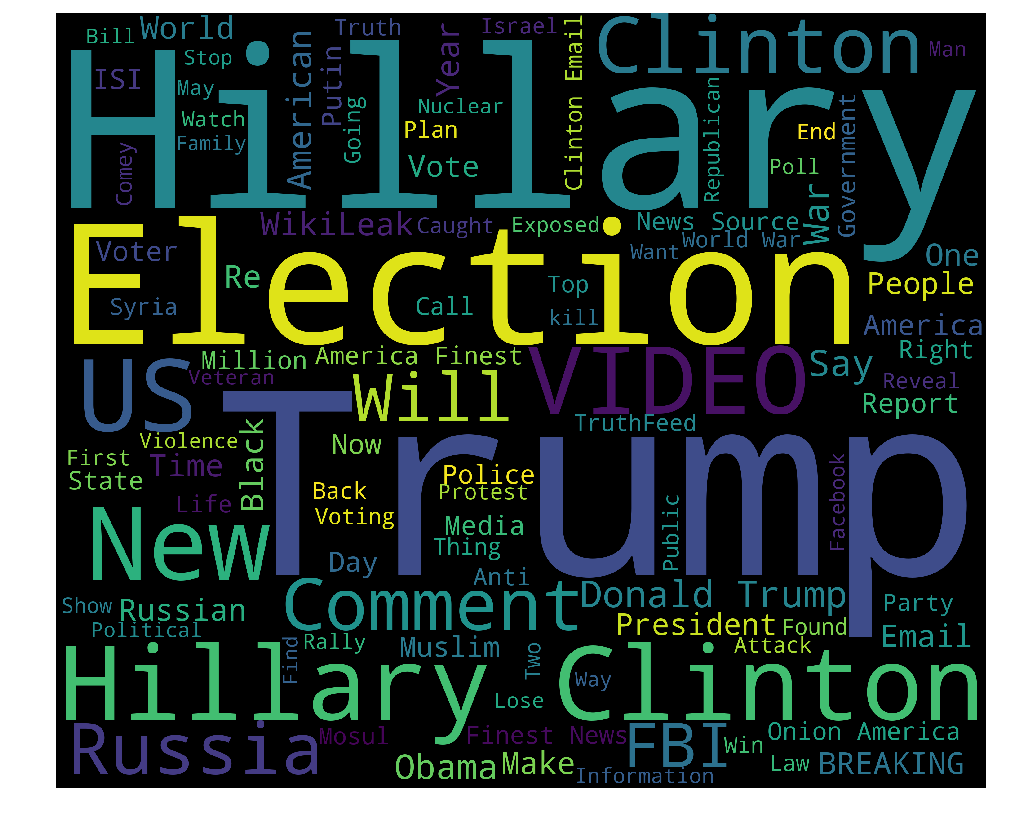

In [177]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

# Defining cloud for fake news
df_cloud = df_train[df_train["label"] == "FAKE"]

words = " ".join(df_cloud["title"])
split_words = " ".join([word for word in words.split()])

# Creating cloud
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    width=3000,
    height=2500,
    max_words=100,
).generate(split_words)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Real News

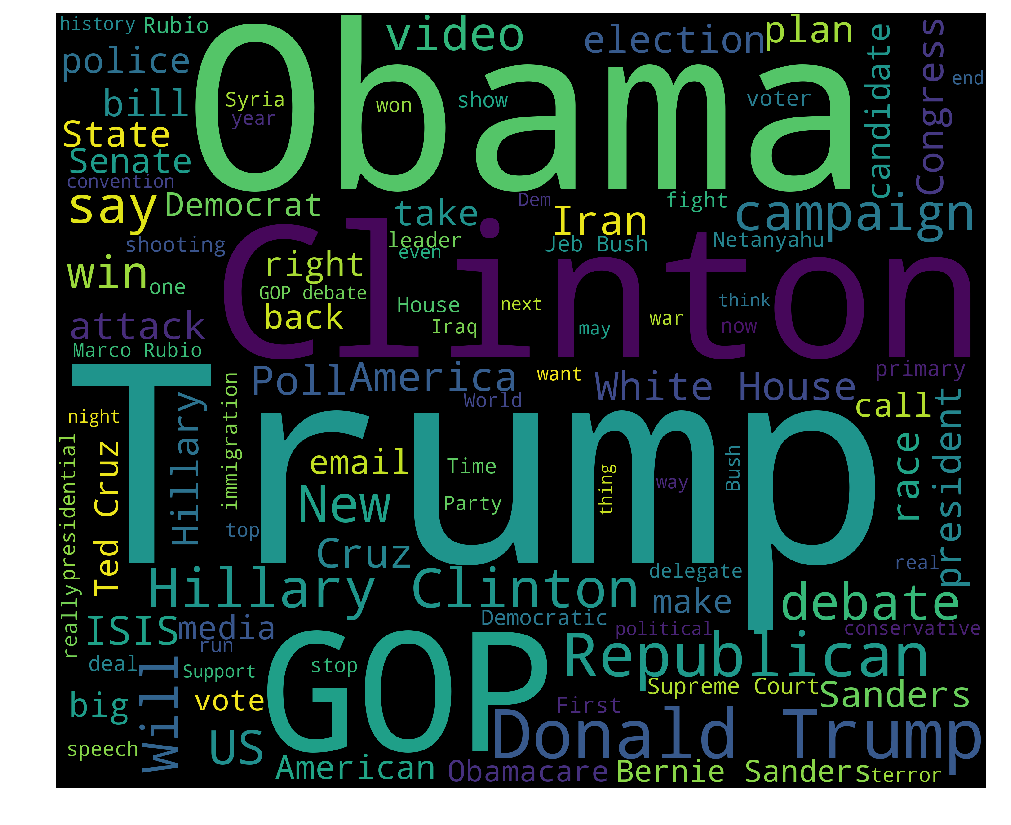

In [178]:
# Defining cloud for real news
df_cloud = df_train[df_train["label"] == "REAL"]

words = " ".join(df_cloud["title"])
split_words = " ".join([word for word in words.split()])

# Creating wordcloud 
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    width=3000,
    height=2500,
    max_words=100,
).generate(split_words)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 3. Prepare Dataset

We will now prepare the dataset for modeling by splitting it into train and validation splits since our test data does not have a label variable. Therefore we will evaluation the model through cross vaildations and moreover the validation set will be used as a test set. For that we will use an 80/20 split.

#### Cross Validation 

In [48]:
# create training and testing sets
import random
random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(df_train.text, df_train.label, test_size=0.2, random_state = 33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3172,) (3172,)
(794,) (794,)


#### Confusion Matrix Function

Before we start we will use the following function to plot the confusion matrix for each model to provide a better visualization for the matrix.
- Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Create Text Vectorizer (Bag of Words)

We will now preprocess the text using CountVectorizer from scikit-learn. The CountVectorizer is a simple way to tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. This is to convert text files into numerical feature vectors. 

In other words, we use it to convert a collection of text documents to a matrix of token counts. This vectorizer will be applied to both the the train and test sets to create the matrices. 

Normally, stop words are not useful in text classification problems. So we will remove stop words in the count vectorizer, as well as remove ascii features.

In [50]:
# Feature Extraction
# Create the transformer that will be used to vectorize
# This will be used to remove accents, stopwords, and perform other character normalization during the preprocessing step.
count_vec = CountVectorizer(strip_accents="ascii", lowercase=False, stop_words='english')

# Use the count vectorizer that was created on both train and test data to create matrices
X_train_ctvc = count_vec.fit_transform(X_train)
X_test_ctvc = count_vec.transform(X_test)
print(X_train_ctvc.shape)
print(X_test_ctvc.shape)

(3172, 63990)
(794, 63990)


#### Create TFIDF Transformer

The problem with using only the count of words in documents is that this process will give more weightage to longer documents than shorter documents. Therefore we use the frequency which is the count of words / total words in each document. TF-IDF stands for term frequency times inverse document frequency

Using the TF-IDF transformer assigns weights to words by dividing the count of words by the length of the document and that leads to reducing weights of common words.

In [51]:
# Feature Extraction
# Create the transformer that will be used to transform the text
tfidf_transformer = TfidfTransformer()

# Use the Tfidf transformer that was created on both train and test data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_ctvc)
X_test_tfidf = tfidf_transformer.transform(X_test_ctvc)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(3172, 63990)
(794, 63990)


## 4. Modeling

### 4.1 Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier.

#### 4.1.1 Using CountVectorizer

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train_ctvc, y_train)
log_reg_prediction = log_reg.predict(X_test_ctvc)
log_reg_acc = metrics.accuracy_score(y_test, log_reg_prediction)
print("logistic regression accuracy on the validation set: %0.3f" % log_reg_acc)

result1 = cross_val_score(log_reg, X_train_ctvc, y_train, scoring="accuracy", cv=5).mean()
print("logistic regression cross-validation accuracy: %0.3f" % result1)

logistic regression accuracy on the validation set: 0.929
logistic regression cross-validation accuracy: 0.910


In [53]:
# Evaluating model in cross-validation iteration
log_reg_scores = cross_val_score(log_reg, X_train_ctvc, y_train, cv=5)
log_reg_accuracy = cross_val_score(estimator=log_reg, X=X_train_ctvc, y=y_train, cv=5)

#####  Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       416
        REAL       0.94      0.92      0.93       378

   micro avg       0.93      0.93      0.93       794
   macro avg       0.93      0.93      0.93       794
weighted avg       0.93      0.93      0.93       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.929471032745592


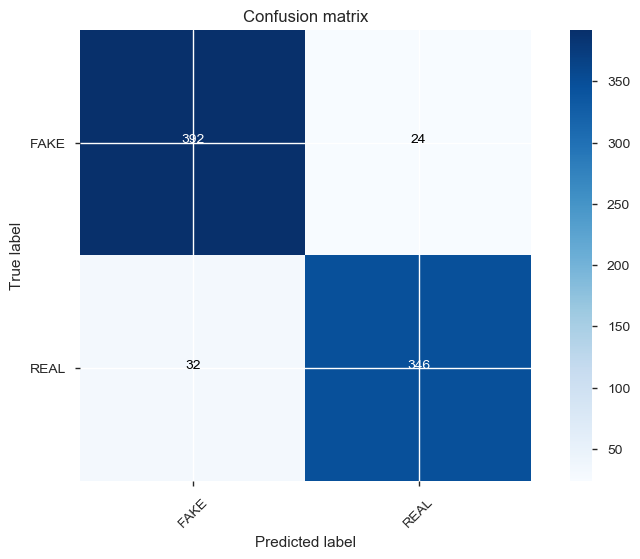

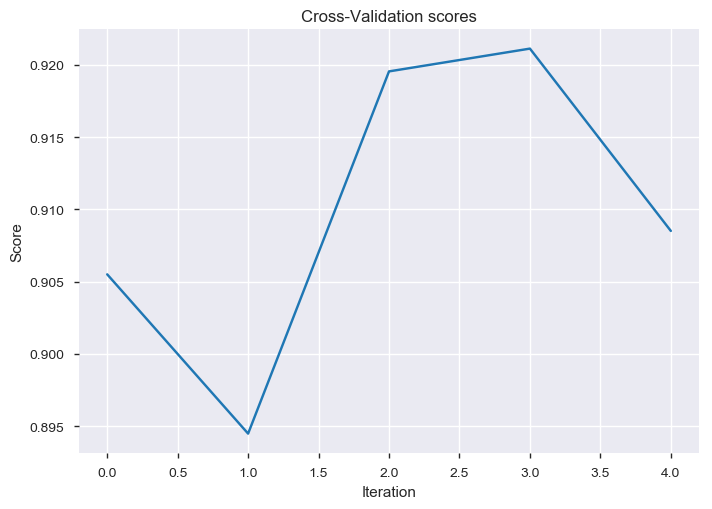

Accuracy::[0.90551181 0.89448819 0.91955836 0.92113565 0.90851735]
Mean Accuracy::0.9098422712933754


In [54]:
# Classification Report
print(classification_report(y_test, log_reg_prediction))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, log_reg_prediction)
plot_confusion_matrix(cm_log_reg, classes=['FAKE', 'REAL'])

# Accuracy
print('Accuracy Score on Test:', accuracy_score(y_test, log_reg_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), log_reg_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(log_reg_scores))
print("Mean Accuracy::{}".format(log_reg_accuracy.mean()))

#### 4.1.2 Using TF-IDF

In [55]:
log_reg.fit(X_train_tfidf, y_train)
log_reg_tfidf_prediction = log_reg.predict(X_test_tfidf)
log_reg_tfidf_acc = metrics.accuracy_score(y_test, log_reg_tfidf_prediction)
print("logistic regression accuracy on the validation set with TFIDF: %0.3f" % log_reg_tfidf_acc)

result2 = cross_val_score(log_reg, X_train_tfidf, y_train, scoring="accuracy", cv=5).mean()
print("logistic regression cross-validation accuracy with TFIDF: %0.3f" % result2)

logistic regression accuracy on the validation set with TFIDF: 0.916
logistic regression cross-validation accuracy with TFIDF: 0.903


In [56]:
# Evaluating model in cross-validation iteration
log_reg_tfidf_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5)
log_reg_tfidf_accuracy = cross_val_score(estimator=log_reg, X=X_train_tfidf, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       416
        REAL       0.94      0.88      0.91       378

   micro avg       0.92      0.92      0.92       794
   macro avg       0.92      0.91      0.92       794
weighted avg       0.92      0.92      0.92       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9156171284634761


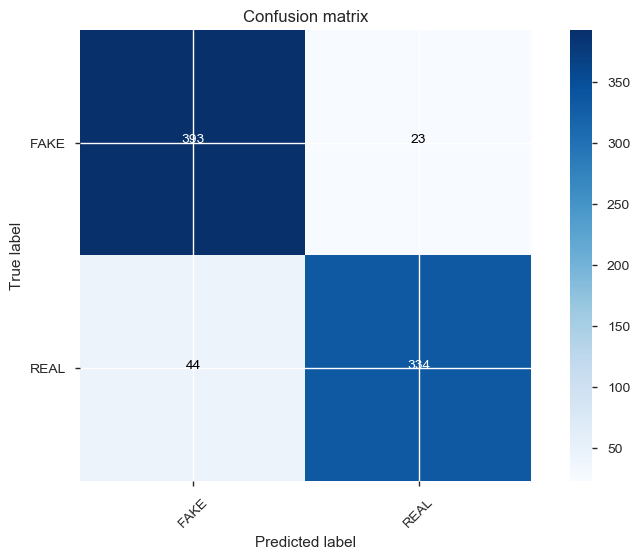

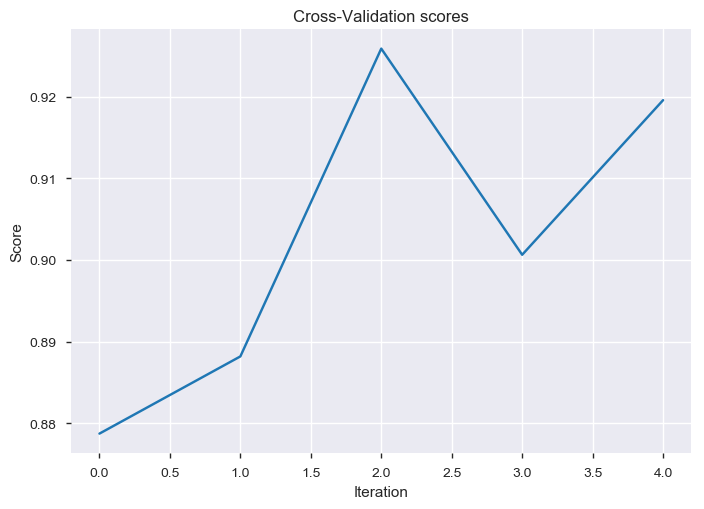

Accuracy::[0.87874016 0.88818898 0.92586751 0.90063091 0.91955836]
Mean Accuracy::0.9025971832385306


In [58]:
# Classification Report
print(classification_report(y_test, log_reg_tfidf_prediction))

# Confusion Matrix
cm_log_reg_tfidf = confusion_matrix(y_test, log_reg_tfidf_prediction)
plot_confusion_matrix(cm_log_reg_tfidf, classes=['FAKE', 'REAL'])

# Accuracy
print('Accuracy Score on Test:', accuracy_score(y_test, log_reg_tfidf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), log_reg_tfidf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(log_reg_tfidf_scores))
print("Mean Accuracy::{}".format(log_reg_tfidf_accuracy.mean()))

#### 4.1.3 Using pipelines

Using pipelines is more convenient and we can use it to write less code and do the previous process in one part.

In [59]:
from sklearn.pipeline import Pipeline

text_clf_logreg = Pipeline(
    [
        (
            "vect",
            CountVectorizer(
                strip_accents="ascii", lowercase=False, stop_words="english"
            ),
        ),
        ("tfidf", TfidfTransformer()),
        ("clf2", LogisticRegression()),
    ]
)
text_clf_logreg = text_clf_logreg.fit(X_train, y_train)

# Performance
predicted = text_clf_logreg.predict(X_test)
np.mean(predicted == y_test)

0.9156171284634761

We will now try to optimize logistic regression function by using a cross-validated grid parameter search.
Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model. We will conduct a grid search to find the parameters producing the highest score.

Specify regularization penalties to be applied. A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

In [60]:
# Specify regularization penalties of Lasso and Ridge
penalty = ["l1", "l2"]

# Create regularization hyperparameter space
C = np.linspace(0.00001, 2, num=10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Grid search using 10-fold cross validation
clf = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0, n_jobs=-1)

# Conduct fit grid search
best_model = clf.fit(X_train_ctvc, y_train)

# Check which applied penalty and hyperparameter is best
print("The best penalty is", best_model.best_estimator_.get_params()["penalty"])
print("The best C value is", best_model.best_estimator_.get_params()["C"])

The best penalty is l2
The best C value is 0.2222311111111111


In [61]:
# Fit the model again using the best parameters
log_reg_2 = LogisticRegression(C=0.2222311111111111, penalty="l2")
log_reg_2.fit(X_train_ctvc, y_train)
log_reg_2_prediction = log_reg.predict(X_test_ctvc)
log_reg_2_acc = metrics.accuracy_score(y_test, log_reg_2_prediction)
print("logistic regression accuracy on the validation set: %0.3f" % log_reg_2_acc)

result3 = cross_val_score(log_reg_2, X_train_ctvc, y_train, scoring="accuracy", cv=5).mean()
print("logistic regression cross-validation accuracy: %0.3f" % result3)

logistic regression accuracy on the validation set: 0.728
logistic regression cross-validation accuracy: 0.916


In [62]:
# Evaluating model in cross-validation iteration
log_reg_2_scores = cross_val_score(log_reg_2, X_train_ctvc, y_train, cv=5)
log_reg_2_accuracy = cross_val_score(estimator=log_reg_2, X=X_train_ctvc, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.99      0.49      0.65       416
        REAL       0.64      0.99      0.78       378

   micro avg       0.73      0.73      0.73       794
   macro avg       0.81      0.74      0.71       794
weighted avg       0.82      0.73      0.71       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.7279596977329975


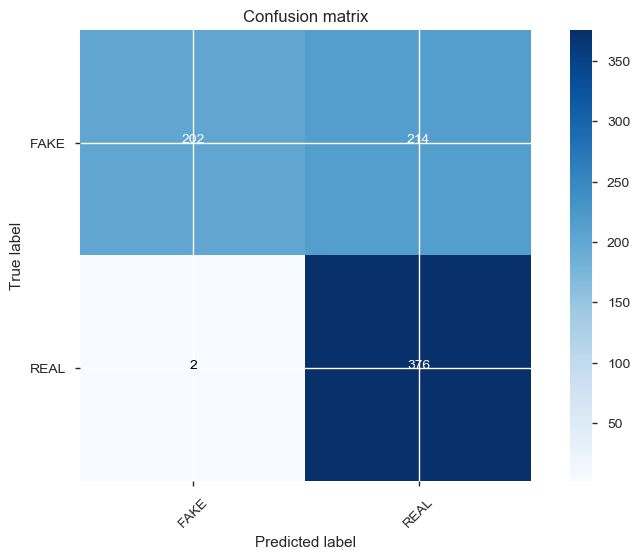

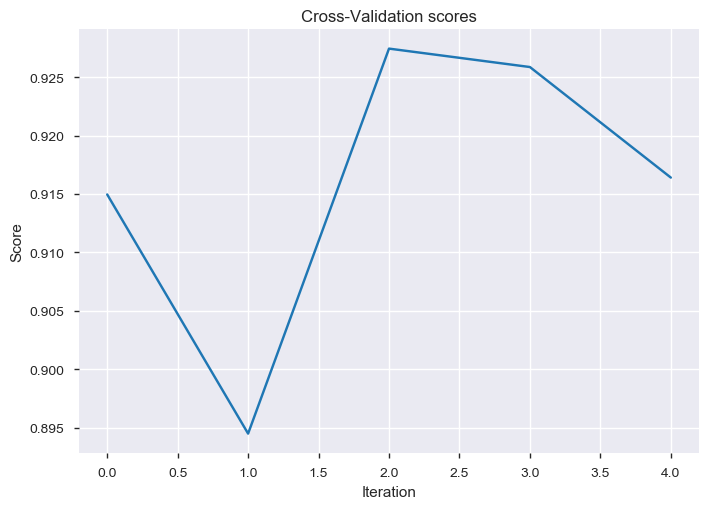

Accuracy::[0.91496063 0.89448819 0.92744479 0.92586751 0.91640379]
Mean Accuracy::0.9158329814451427


In [63]:
# Classification Report
print(classification_report(y_test, log_reg_2_prediction))

# Confusion Matrix
cm_log_reg_pipeline = confusion_matrix(y_test, log_reg_2_prediction)
plot_confusion_matrix(cm_log_reg_pipeline , classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, log_reg_2_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), log_reg_2_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(log_reg_2_scores))
print("Mean Accuracy::{}".format(log_reg_2_accuracy.mean()))

The accuracy score after applying the penalty using cross validation seems to increase when applied on the training set however the accuracy drops a lot when applied to the validation set. The model has a recall of 49% which is very low compared to the previous models, which means that most of the FAKE class is predicted to be REAL. Therefore, the first Logistic Regression model remains the best so far. Next we will try Naive Bayes!

### 4.2 Naive Bayes

#### 4.2.1 Using CountVectorizer

In [64]:
# Training Naive Bayes (NB) classifier on training data.
NB_clf = MultinomialNB().fit(X_train_ctvc, y_train)

NB_clf_prediction = NB_clf.predict(X_test_ctvc)
NB_clf_acc = metrics.accuracy_score(y_test, NB_clf_prediction)
print("Naive Bayes accuracy on the validation set: %0.3f" % NB_clf_acc)

result4 = cross_val_score(
    NB_clf, X_train_ctvc, y_train, scoring="accuracy", cv=10
).mean()
print("Naive Bayes cross-validation accuracy: %0.3f" % result4)

Naive Bayes accuracy on the validation set: 0.898
Naive Bayes cross-validation accuracy: 0.900


In [66]:
# Evaluating model in cross-validation iteration
NB_clf_scores = cross_val_score(NB_clf, X_train_ctvc, y_train, cv=5)
NB_clf_accuracy = cross_val_score(estimator=NB_clf, X=X_train_ctvc, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.94      0.86      0.90       416
        REAL       0.86      0.94      0.90       378

   micro avg       0.90      0.90      0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.8979848866498741


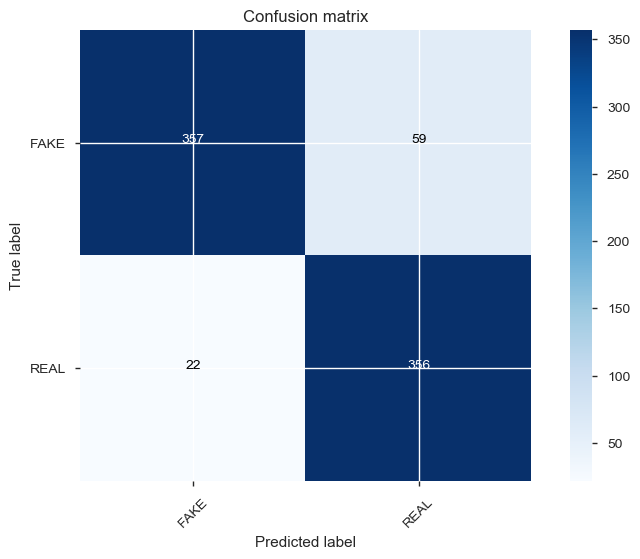

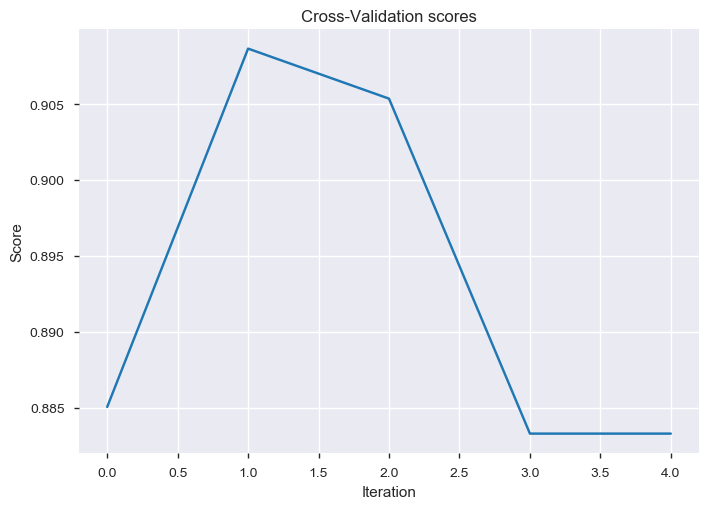

Accuracy::[0.88503937 0.90866142 0.90536278 0.88328076 0.88328076]
Mean Accuracy::0.893125015524479


In [67]:
# Classification Report
print(classification_report(y_test, NB_clf_prediction))

# Confusion Matrix
cm_NB_ctvc = confusion_matrix(y_test, NB_clf_prediction)
plot_confusion_matrix(cm_NB_ctvc, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, NB_clf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), NB_clf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(NB_clf_scores))
print("Mean Accuracy::{}".format(NB_clf_accuracy.mean()))

#### 4.2.2 Using Tfidf

In [68]:
NB_clf_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)
NB_clf_tfidf_prediction = NB_clf_tfidf.predict(X_test_tfidf)
NB_clf_tfidf_acc = metrics.accuracy_score(y_test, NB_clf_tfidf_prediction)
print("Naive Bayes accuracy on the validation set with TFIDF: %0.3f" % NB_clf_tfidf_acc)

result5 = cross_val_score(log_reg, X_train_tfidf, y_train, scoring="accuracy", cv=5).mean()
print("Naive Bayes cross-validation accuracy with TFIDF: %0.3f" % result5)

Naive Bayes accuracy on the validation set with TFIDF: 0.780
Naive Bayes cross-validation accuracy with TFIDF: 0.903


In [70]:
# Evaluating model in cross-validation iteration
NB_clf_tfidf_scores = cross_val_score(NB_clf_tfidf, X_train_tfidf, y_train, cv=5)
NB_clf_tfidf_accuracy = cross_val_score(estimator=NB_clf_tfidf, X=X_train_tfidf, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.98      0.59      0.74       416
        REAL       0.69      0.99      0.81       378

   micro avg       0.78      0.78      0.78       794
   macro avg       0.83      0.79      0.77       794
weighted avg       0.84      0.78      0.77       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.7795969773299748


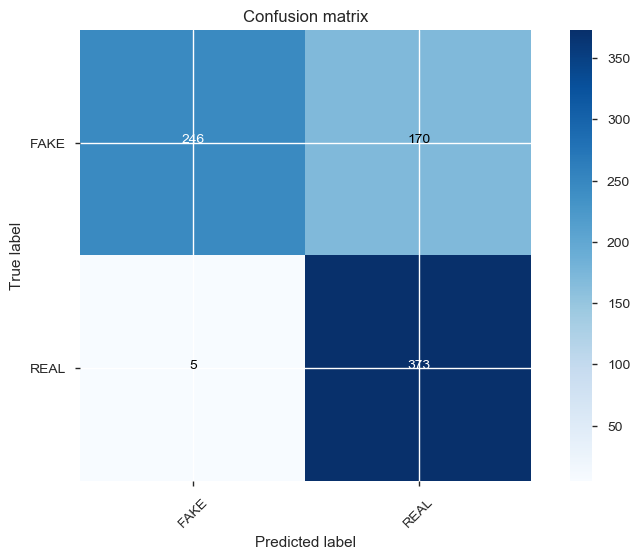

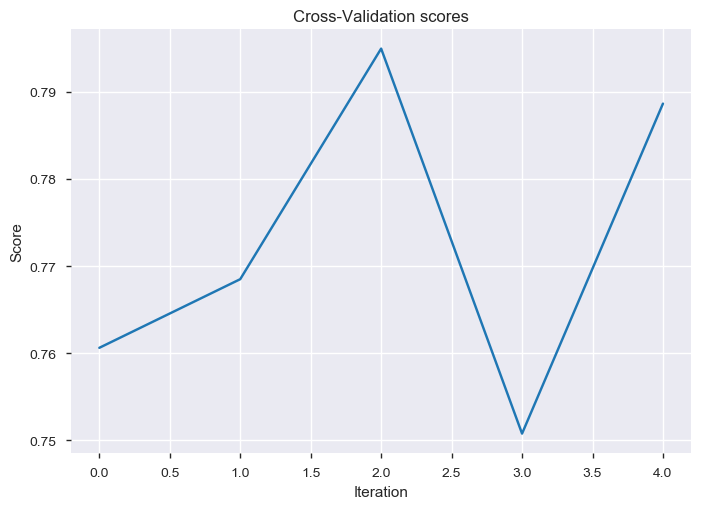

Accuracy::[0.76062992 0.76850394 0.79495268 0.75078864 0.78864353]
Mean Accuracy::0.7727037432623761


In [71]:
# Classification Report
print(classification_report(y_test, NB_clf_tfidf_prediction))

# Confusion Matrix
cm_NB_tfidf = confusion_matrix(y_test, NB_clf_tfidf_prediction)
plot_confusion_matrix(cm_NB_tfidf, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, NB_clf_tfidf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), NB_clf_tfidf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(NB_clf_tfidf_scores))
print("Mean Accuracy::{}".format(NB_clf_tfidf_accuracy.mean()))

#### 4.2.3 Pipelines

We will now try the same process by using pipelines and optimizing the model using grid search

In [72]:
# Pipeline
from sklearn.pipeline import Pipeline

NB_clf_pipe = Pipeline(
    [
        (
            "vect",
            CountVectorizer(
                strip_accents="ascii", lowercase=False, stop_words="english"
            ),
        ),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB()),
    ]
)


In [73]:
NB_clf_pipe = NB_clf_pipe.fit(X_train, y_train)
NB_clf_pipe_prediction = NB_clf_pipe.predict(X_test)
NB_clf_pipe_acc = metrics.accuracy_score(y_test, NB_clf_pipe_prediction)
print("NB accuracy on the test set: %0.3f" % NB_clf_pipe_acc)

result6 = cross_val_score(NB_clf_pipe, X_train, y_train, scoring="accuracy", cv=5).mean()
print("NB cross-validation accuracy: %0.3f" % result6)

NB accuracy on the test set: 0.780
NB cross-validation accuracy: 0.777


We notice how the accuracy drops compared to the previous model which had mean accuracy of 89. Therefore we will perform a grid seach and use the best parameters to improve our model.

#### Grid Search for Naive Bayes

In [74]:
parameters = {
    "vect__ngram_range": [(1, 4), (1,6)],
    "tfidf__use_idf": (True, False),
    "clf__alpha": (1e-2, 1e-3),
}

NB_clf_gridsearch = GridSearchCV(NB_clf_pipe, parameters, n_jobs=-1)
NB_clf_gridsearch = NB_clf_gridsearch.fit(X_train, y_train)

print(NB_clf_gridsearch.best_score_)
print(NB_clf_gridsearch.best_params_)

0.9224464060529635
{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 6)}


In [75]:
NB_clf_pipe_prediction = NB_clf_gridsearch.predict(X_test)
NB_clf_pipe_acc = metrics.accuracy_score(y_test, NB_clf_pipe_prediction)
print("NB accuracy on the test set: %0.3f" % NB_clf_acc)

result6 = cross_val_score(NB_clf_gridsearch, X_train, y_train, scoring="accuracy", cv=5).mean()
print("NB cross-validation accuracy: %0.3f" % result6)

NB accuracy on the test set: 0.898
NB cross-validation accuracy: 0.923


In [81]:
NB_clf_pipe_scores = cross_val_score(NB_clf_gridsearch, X_train, y_train, cv=5)

              precision    recall  f1-score   support

        FAKE       0.97      0.89      0.93       416
        REAL       0.89      0.97      0.93       378

   micro avg       0.93      0.93      0.93       794
   macro avg       0.93      0.93      0.93       794
weighted avg       0.93      0.93      0.93       794

[[372  44]
 [ 11 367]]
Confusion matrix, without normalization
Accuracy Score on Test: 0.9307304785894207


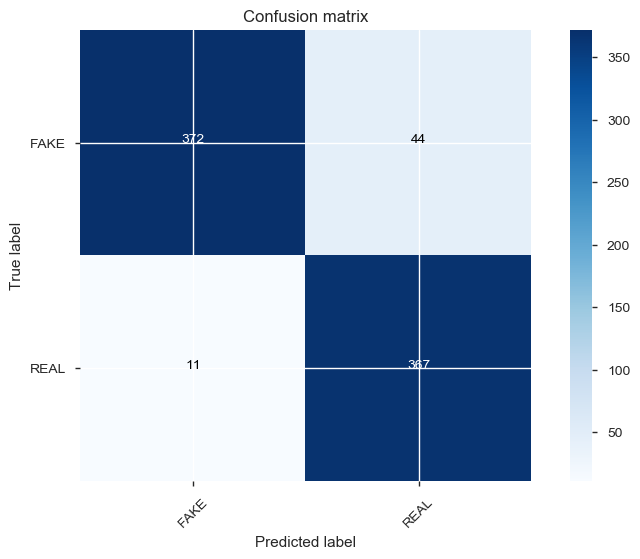

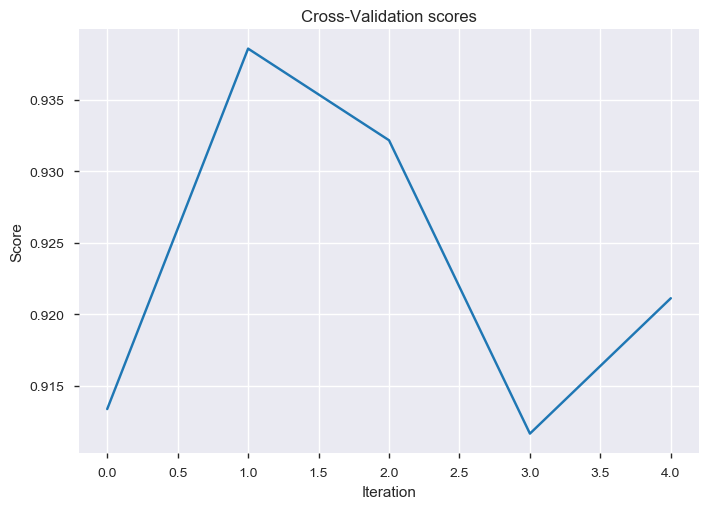

Accuracy::[0.91338583 0.93858268 0.93217666 0.91167192 0.92113565]
Mean Accuracy::0.9233905462132691


In [84]:
# Classification Report
print(classification_report(y_test, NB_clf_pipe_prediction))

# Confusion Matrix
cm = confusion_matrix(y_test, NB_clf_pipe_prediction)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, NB_clf_pipe_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), NB_clf_pipe_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(NB_clf_pipe_scores))
print("Mean Accuracy::{}".format(result6.mean()))

###  4.3 SGD Classifier

This classifier regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance. 

By default the model fits a linear SVM.

- Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

#### 4.3.1 Using Count Vectorizer

In [91]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state= 33)
sgd_clf.fit(X_train_ctvc, y_train)
sgd_clf_prediction = sgd_clf.predict(X_test_ctvc)
sgd_clf_acc = metrics.accuracy_score(y_test, sgd_clf_prediction)
print("Stochastic Gradient Descent accuracy on the test set: %0.3f" % sgd_clf_acc)

result7 = cross_val_score(sgd_clf, X_train_ctvc, y_train, scoring="accuracy", cv=5).mean()
print("Stochastic Gradient Descent cross-validation accuracy: %0.3f" % result7)

Stochastic Gradient Descent accuracy on the test set: 0.921
Stochastic Gradient Descent cross-validation accuracy: 0.904


In [93]:
# Evaluating model in cross-validation iteration
sgd_clf_scores = cross_val_score(sgd_clf, X_train_ctvc, y_train, cv=5)
sgd_clf_accuracy = cross_val_score(estimator=sgd_clf, X=X_train_ctvc, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.92       416
        REAL       0.92      0.91      0.92       378

   micro avg       0.92      0.92      0.92       794
   macro avg       0.92      0.92      0.92       794
weighted avg       0.92      0.92      0.92       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9206549118387909


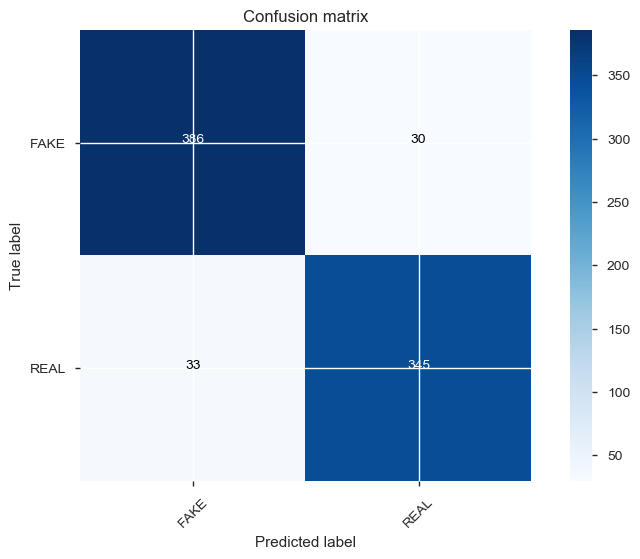

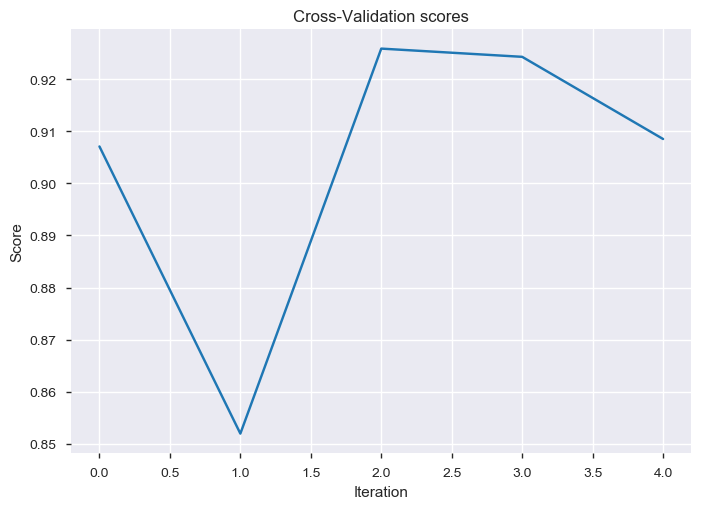

Accuracy::[0.90708661 0.8519685  0.92586751 0.92429022 0.90851735]
Mean Accuracy::0.903546039394918


In [95]:
# Classification Report
print(classification_report(y_test, sgd_clf_prediction))

# Confusion Matrix
cm_sgd = confusion_matrix(y_test, sgd_clf_prediction)
plot_confusion_matrix(cm_sgd, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, sgd_clf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), sgd_clf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(sgd_clf_scores))
print("Mean Accuracy::{}".format(sgd_clf_accuracy.mean()))

#### 4.3.1 Using Tfidf

In [96]:
sgd_clf.fit(X_train_tfidf, y_train)
sgd_clf_tfidf_prediction = sgd_clf.predict(X_test_tfidf)
sgd_clf_tfidf_acc = metrics.accuracy_score(y_test, sgd_clf_tfidf_prediction)
print("Stochastic Gradient Descent accuracy on the test set: %0.3f" % sgd_clf_tfidf_acc)

result8 = cross_val_score(sgd_clf, X_train_tfidf, y_train, scoring="accuracy", cv=5).mean()
print("Stochastic Gradient Descent cross-validation accuracy: %0.3f" % result8)

Stochastic Gradient Descent accuracy on the test set: 0.918
Stochastic Gradient Descent cross-validation accuracy: 0.907


In [98]:
# Evaluating model in cross-validation iteration
sgd_clf_tfidf_scores = cross_val_score(sgd_clf, X_train_tfidf, y_train, cv=5)
sgd_clf_tfidf_accuracy = cross_val_score(estimator=sgd_clf, X=X_train_tfidf, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.89      0.96      0.92       416
        REAL       0.95      0.87      0.91       378

   micro avg       0.92      0.92      0.92       794
   macro avg       0.92      0.92      0.92       794
weighted avg       0.92      0.92      0.92       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9181360201511335


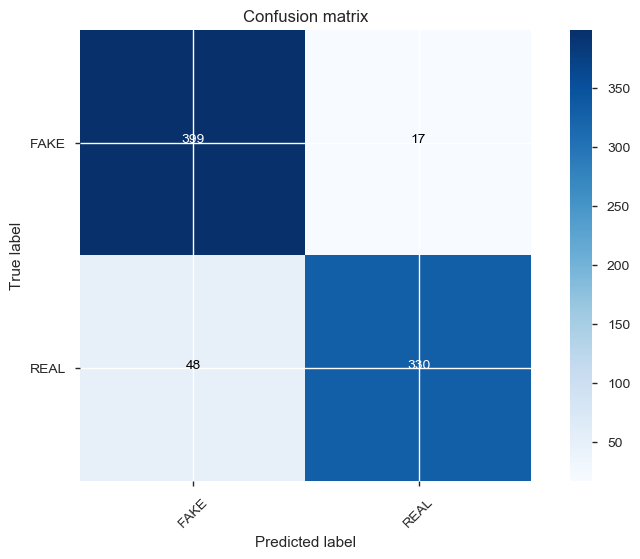

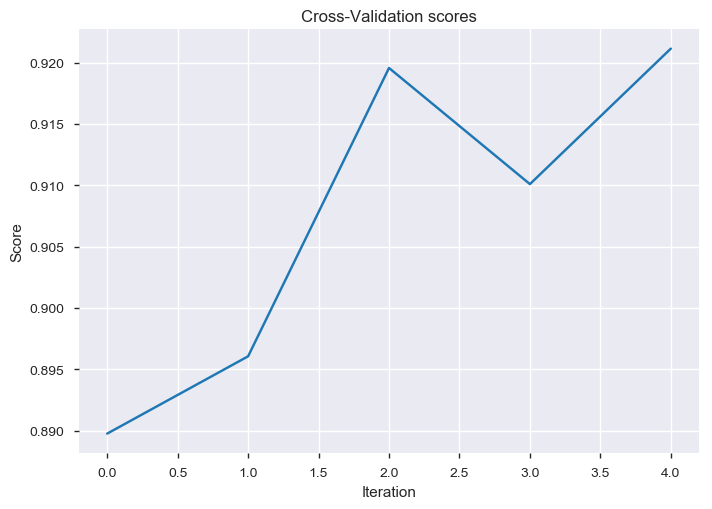

Accuracy::[0.88976378 0.89606299 0.91955836 0.91009464 0.92113565]
Mean Accuracy::0.9073230830373333


In [99]:
# Classification Report
print(classification_report(y_test, sgd_clf_tfidf_prediction))

# Confusion Matrix
cm_sgd_tfidf = confusion_matrix(y_test, sgd_clf_tfidf_prediction)
plot_confusion_matrix(cm_sgd_tfidf, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, sgd_clf_tfidf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), sgd_clf_tfidf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(sgd_clf_tfidf_scores))
print("Mean Accuracy::{}".format(sgd_clf_tfidf_accuracy.mean()))

### 4.4 SVM

#### 4.4.1 Linear SVM

#### Using Count Vectorizer

In [101]:
# SVM classifier on training data.
from sklearn.svm import LinearSVC
svmL_clf = LinearSVC().fit(X_train_ctvc, y_train)

svmL_clf_prediction = svmL_clf.predict(X_test_ctvc)
svmL_clf_acc = metrics.accuracy_score(y_test, svmL_clf_prediction)
print("Linear SVM accuracy on the test set: %0.3f" % svmL_clf_acc)

result7 = cross_val_score(svmL_clf, X_train_ctvc, y_train, scoring="accuracy", cv=5).mean()
print("Linear SVM cross-validation accuracy: %0.3f" % result7)

Linear SVM accuracy on the test set: 0.894
Linear SVM cross-validation accuracy: 0.868


In [102]:
# Evaluating model in cross-validation iteration
svmL_clf_scores = cross_val_score(svmL_clf, X_train_ctvc, y_train, cv=5)
svmL_clf_accuracy = cross_val_score(estimator=svmL_clf, X=X_train_ctvc, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.90      0.89      0.90       416
        REAL       0.88      0.90      0.89       378

   micro avg       0.89      0.89      0.89       794
   macro avg       0.89      0.89      0.89       794
weighted avg       0.89      0.89      0.89       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.8942065491183879


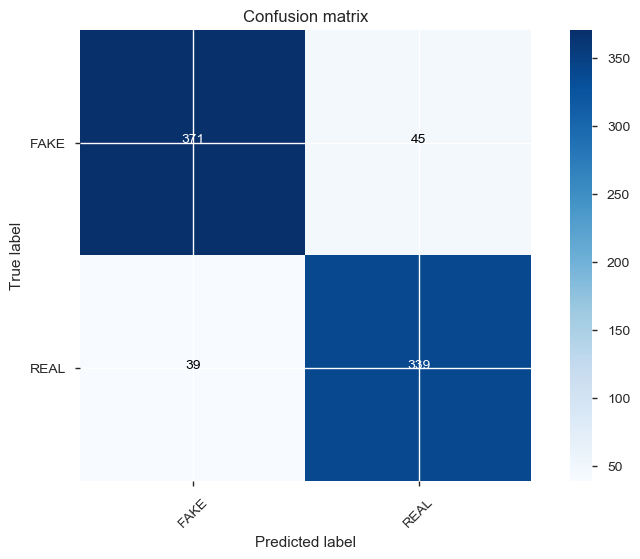

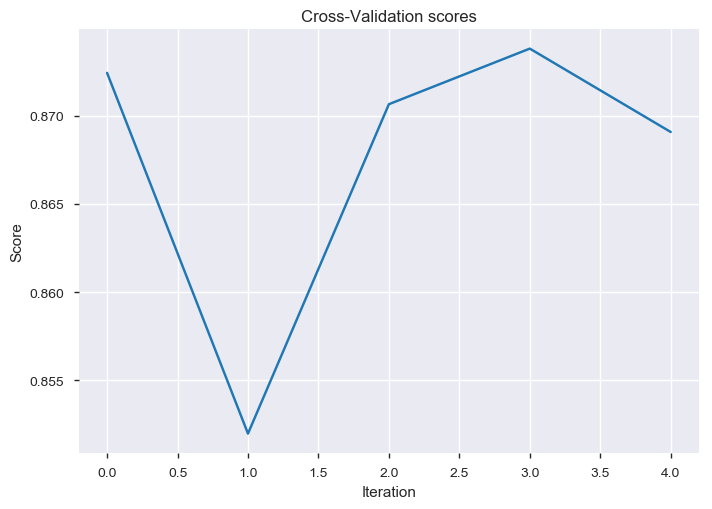

Accuracy::[0.87244094 0.8519685  0.87066246 0.87381703 0.86908517]
Mean Accuracy::0.8675948235177227


In [103]:
# Classification Report
print(classification_report(y_test, svmL_clf_prediction))

# Confusion Matrix
cm_svmL = confusion_matrix(y_test, svmL_clf_prediction)
plot_confusion_matrix(cm_svmL, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svmL_clf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), svmL_clf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(svmL_clf_scores))
print("Mean Accuracy::{}".format(svmL_clf_accuracy.mean()))

#### Pipelines

In [106]:
# Training Support Vector Machines - SVM

svmL_clf_pipe = Pipeline(
    [
        (
            "vect",
            CountVectorizer(
                strip_accents="ascii", lowercase=False, stop_words="english"
            ),
        ),
        ("tfidf", TfidfTransformer()),
        ("clf-svm", LinearSVC()),
    ]
)

svmL_clf_pipe = svmL_clf_pipe.fit(X_train, y_train)
svmL_clf_pipe_pred = svmL_clf_pipe.predict(X_test)

In [107]:
svmL_clf_pipe_acc = metrics.accuracy_score(y_test, svmL_clf_pipe_pred)
print("Linear SVM accuracy on the test set: %0.3f" % svmL_clf_pipe_acc)

result8 = cross_val_score(svmL_clf_pipe, X_train, y_train, scoring="accuracy", cv=5).mean()
print("Linear SVM cross-validation accuracy: %0.3f" % result8)

Linear SVM accuracy on the test set: 0.938
Linear SVM cross-validation accuracy: 0.929


In [109]:
# Evaluating model in cross-validation iteration
svmL_clf_pipe_scores = cross_val_score(svmL_clf_pipe, X_train, y_train, cv=5)
svmL_clf_pipe_accuracy = cross_val_score(estimator=svmL_clf_pipe, X=X_train, y=y_train, cv=5)

              precision    recall  f1-score   support

        FAKE       0.93      0.96      0.94       416
        REAL       0.95      0.92      0.93       378

   micro avg       0.94      0.94      0.94       794
   macro avg       0.94      0.94      0.94       794
weighted avg       0.94      0.94      0.94       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9382871536523929


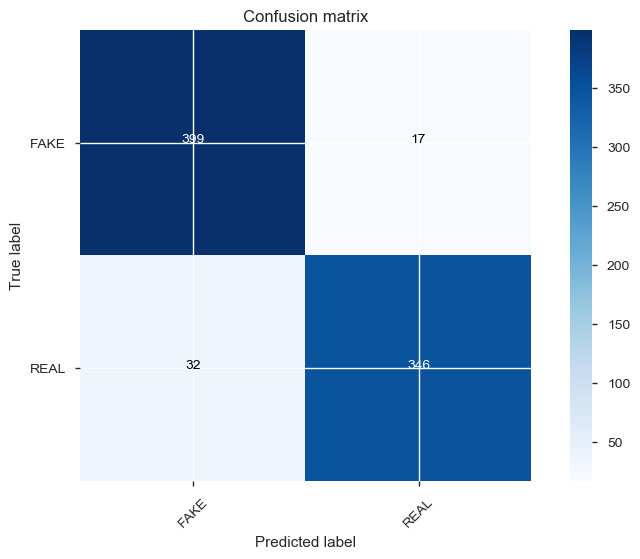

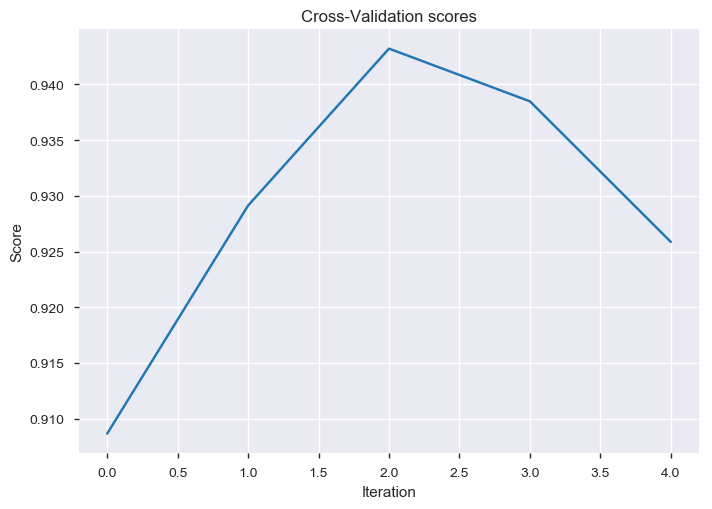

Accuracy::[0.90866142 0.92913386 0.94321767 0.9384858  0.92586751]
Mean Accuracy::0.9290732507017065


In [118]:
# Classification Report
print(classification_report(y_test, svmL_clf_pipe_pred))

# Confusion Matrix
cm_svmL_pipe = confusion_matrix(y_test, svmL_clf_pipe_pred)
plot_confusion_matrix(cm_svmL_pipe, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svmL_clf_pipe_pred))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), svmL_clf_pipe_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(svmL_clf_pipe_scores))
print("Mean Accuracy::{}".format(svmL_clf_pipe_accuracy.mean()))

We notice a big improvement in model performance when applying a pipeline of count vectorizer, tfidf, then linear SVC to the dataset. Next we will try using a non-linear SVM with RBF kernel.

#### Grid Search

For further improvement, we will try grid searching for the best parameters and check for improvement.

In [114]:
parameters_svmL = {
    "vect__ngram_range": [(1, 4), (1, 6)],
    "tfidf__use_idf": (True, False)
}

svmL_clf_pipe_gridsearch = GridSearchCV(svmL_clf_pipe, parameters_svmL, n_jobs=-1)
svmL_clf_pipe_gridsearch = svmL_clf_pipe_gridsearch.fit(X_train, y_train)

print(svmL_clf_pipe_gridsearch.best_score_)
print(svmL_clf_pipe_gridsearch.best_params_)

0.9192938209331651
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 4)}


In [115]:
svmL_clf_pipe_gridsearch_prediction = svmL_clf_pipe_gridsearch.predict(X_test)
svmL_clf_pipe_gridsearch_acc = metrics.accuracy_score(y_test, svmL_clf_pipe_gridsearch_prediction)
print("NB accuracy on the test set: %0.3f" % svmL_clf_pipe_gridsearch_acc)

result9 = cross_val_score(svmL_clf_pipe_gridsearch, X_train, y_train, scoring="accuracy", cv=5).mean()
print("NB cross-validation accuracy: %0.3f" % result9)

NB accuracy on the test set: 0.922
NB cross-validation accuracy: 0.922


              precision    recall  f1-score   support

        FAKE       0.94      0.91      0.92       416
        REAL       0.91      0.93      0.92       378

   micro avg       0.92      0.92      0.92       794
   macro avg       0.92      0.92      0.92       794
weighted avg       0.92      0.92      0.92       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9219143576826196


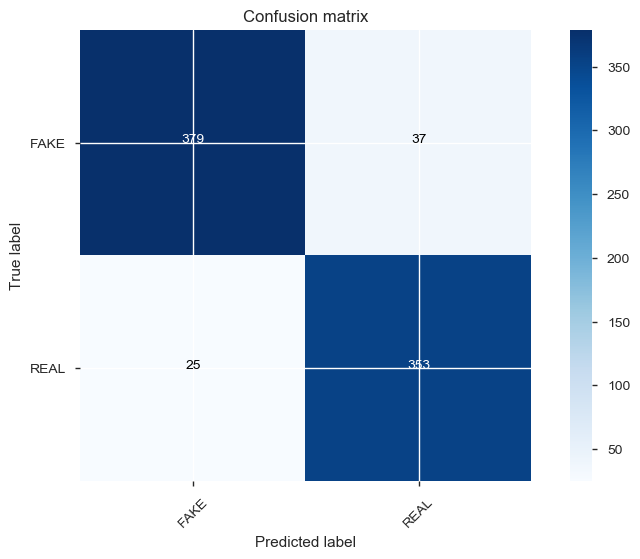

In [117]:
# Classification Report
print(classification_report(y_test, svmL_clf_pipe_gridsearch_prediction))

# Confusion Matrix
cm_svmL_pipe = confusion_matrix(y_test, svmL_clf_pipe_gridsearch_prediction)
plot_confusion_matrix(cm_svmL_pipe, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svmL_clf_pipe_gridsearch_prediction))

####  4.4.2 RBF SVM

In [111]:
# SVM classifier on training data.
from sklearn.svm import SVC
svm_rbf_clf = SVC(kernel='rbf', gamma='auto')
# fitting model
svm_rbf_clf.fit(X_train_ctvc, y_train)

svm_rbf_clf_prediction = svm_rbf_clf.predict(X_test_ctvc)
svm_rbf_clf_acc = metrics.accuracy_score(y_test, svm_rbf_clf_prediction)
print("RBF SVM accuracy: %0.3f" % svm_rbf_clf_acc)

result9 = cross_val_score(svm_rbf_clf, X_train_ctvc, y_train, scoring="accuracy", cv=5).mean()
print("RBF SVM cross-validation accuracy: %0.3f" % result9)

RBF SVM accuracy: 0.762
RBF SVM cross-validation accuracy: 0.711


In [112]:
# Evaluating model in cross-validation iteration
svm_rbf_scores = cross_val_score(svm_rbf_clf, X_train_ctvc, y_train, cv=5)
svm_rbf_accuracy = cross_val_score(estimator=svm_rbf_clf, X=X_train_ctvc, y=y_train, cv=5)

##### Model Evaluation

              precision    recall  f1-score   support

        FAKE       0.67      0.95      0.79       401
        REAL       0.91      0.53      0.67       393

   micro avg       0.74      0.74      0.74       794
   macro avg       0.79      0.74      0.73       794
weighted avg       0.79      0.74      0.73       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.7405541561712846


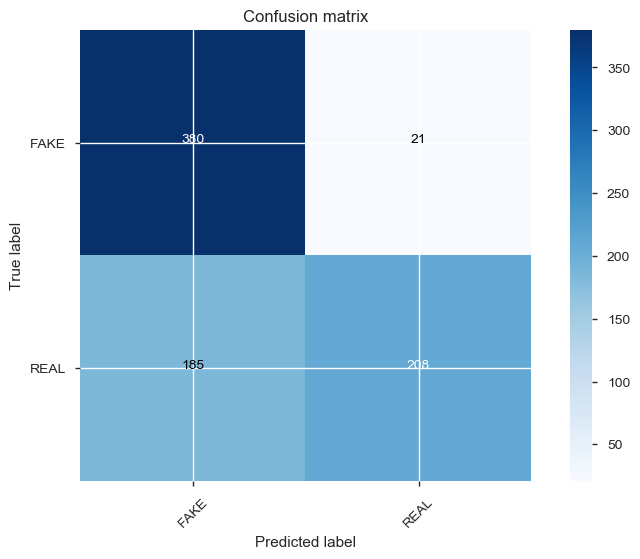

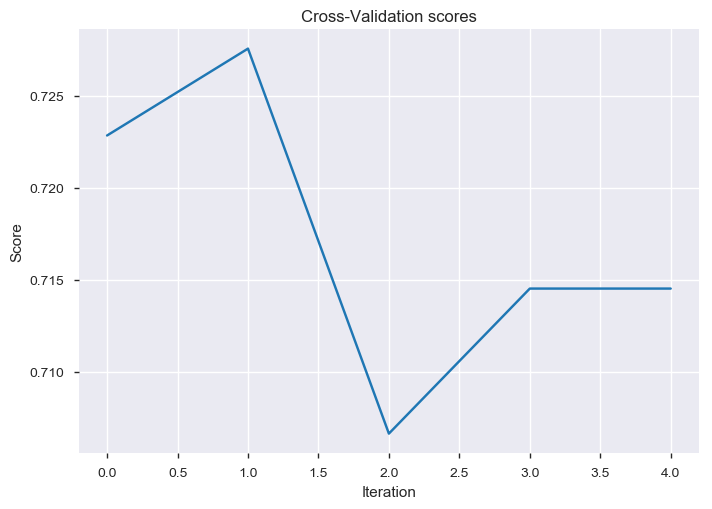

Accuracy::[0.72283465 0.72755906 0.70662461 0.71451104 0.71451104]
Mean Accuracy::0.7172080776969125


In [286]:
# Classification Report
print(classification_report(y_test, svm_rbf_clf_prediction))

# Confusion Matrix
cm_svmrbf = confusion_matrix(y_test, svm_rbf_clf_prediction)
plot_confusion_matrix(cm_svmrbf, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svm_rbf_clf_prediction))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), svm_rbf_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(svm_rbf_scores))
print("Mean Accuracy::{}".format(svm_rbf_accuracy.mean()))

A non-linear Kernel does not perform very well as for the case with linear SVM.

### Stemming

Stemming works on reducing terms to their stems in information retreival. Stems are the core meaning-baring units in a word, so we want to reduce words to their stems by chopping off affixes. For example the words automates, automation, and automating all become automat, etc. We will now try stemming with Naive Bayes and compare the results to what we previously obtained.

We will use the SnowballStemmer which works well for English language. 

- source: https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

In [137]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [138]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])


stemmed_count_vect = StemmedCountVectorizer(
    stop_words="english", strip_accents="ascii", lowercase=False
)

In [139]:
# Use the count vectorizer that was created on both train and test data to create matrices
X_train_stem = stemmed_count_vect.fit_transform(X_train)
X_test_stem = stemmed_count_vect.transform(X_test)

In [140]:
print(X_train_stem.shape)
print(X_test_stem.shape)

(3172, 34887)
(794, 34887)


In [141]:
NB_clf_stem = MultinomialNB().fit(X_train_stem, y_train)
NB_clf_stem_prediction = NB_clf_stem.predict(X_test_stem)

In [142]:
NB_clf_stem_prediction = NB_clf_stem.predict(X_test_stem)
NB_clf_stem_acc = metrics.accuracy_score(y_test, NB_clf_stem_prediction)
print("Naive Bayes accuracy on the test set: %0.3f" % NB_clf_stem_acc)

result10 = cross_val_score(NB_clf_stem, X_train_stem, y_train, scoring="accuracy", cv=10).mean()
print("Naive Bayes cross-validation accuracy: %0.3f" % result10)

Naive Bayes accuracy on the test set: 0.887
Naive Bayes cross-validation accuracy: 0.881


#### Using Tfidf

We will use the TFIDF transormer on the stemmed data to see if this will improve from our model.

In [143]:
# Use the Tfidf transformer that was created on both train and test data
X_train_stem_tfidf = tfidf_transformer.fit_transform(X_train_stem)
X_test_stem_tfidf = tfidf_transformer.transform(X_test_stem)
print(X_train_stem_tfidf.shape)
print(X_test_stem_tfidf.shape)

(3172, 34887)
(794, 34887)


In [144]:
NB_clf_stem = MultinomialNB().fit(X_train_stem_tfidf, y_train)
NB_clf_stem_prediction = NB_clf_stem.predict(X_test_stem_tfidf)

In [145]:
NB_clf_stem_prediction = NB_clf_stem.predict(X_test_stem_tfidf)
NB_clf_stem_acc = metrics.accuracy_score(y_test, NB_clf_stem_prediction)
print("Naive Bayes accuracy on the test set: %0.3f" % NB_clf_stem_acc)

result11 = cross_val_score(NB_clf_stem, X_train_stem_tfidf, y_train, scoring="accuracy", cv=10).mean()
print("Naive Bayes cross-validation accuracy: %0.3f" % result11)

Naive Bayes accuracy on the test set: 0.807
Naive Bayes cross-validation accuracy: 0.809


We dont see an improvement to our model comapred to the previously evaluated NB. Therefore some words might be losing meaning by stemming and consequently reducing the accuracy of our model.

### Lemmatization

Lemmatization is a more calculated process than stemming. It involves resolving words to their dictionary form. In fact, a lemma of a word is its dictionary form!

In [180]:
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
count_vect_lemma = CountVectorizer(
    tokenizer=LemmaTokenizer(),
    stop_words="english",
    ngram_range=(1, 4),
    strip_accents="ascii",
    lowercase=False,
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [182]:
# Use the count vectorizer that was created on both train and test data to create matrices
X_train_lemma = count_vect_lemma.fit_transform(X_train)
X_test_lemma = count_vect_lemma.transform(X_test)
print(X_train_lemma.shape)
print(X_test_lemma.shape)

In [185]:
NB_clf_lemma = MultinomialNB().fit(X_train_lemma, y_train)
NB_clf_lemma_prediction = NB_clf_lemma.predict(X_test_lemma)

In [187]:
NB_clf_lemma_acc = metrics.accuracy_score(y_test, NB_clf_lemma_prediction)
print("Naive Bayes accuracy on the test set: %0.3f" % NB_clf_lemma_acc)

result12 = cross_val_score(NB_clf_lemma, X_train_lemma, y_train, scoring="accuracy", cv=10).mean()
print("Naive Bayes cross-validation accuracy: %0.3f" % result12)

Naive Bayes accuracy on the test set: 0.869
Naive Bayes cross-validation accuracy: 0.933


The cross validation accuracy shows good performance using lemmatization so we will use the TF-IDF transormer with lemmatization to remove sparcity from text.

In [188]:
# Use the Tfidf transformer that was created on both train and test data
X_train_lemma_tfidf = tfidf_transformer.fit_transform(X_train_lemma)
X_test_lemma_tfidf = tfidf_transformer.transform(X_test_lemma)
print(X_train_lemma_tfidf.shape)
print(X_test_lemma_tfidf.shape)

(3172, 3834595)
(794, 3834595)


In [189]:
NB_clf_lemma = MultinomialNB().fit(X_train_lemma_tfidf, y_train)
NB_clf_lemma_prediction = NB_clf_lemma.predict(X_test_lemma_tfidf)

In [190]:
NB_clf_lemma_prediction = NB_clf_lemma.predict(X_test_lemma_tfidf)
NB_clf_lemma_acc = metrics.accuracy_score(y_test, NB_clf_lemma_prediction)
print("Naive Bayes accuracy on the test set: %0.3f" % NB_clf_lemma_acc)

result13 = cross_val_score(NB_clf_lemma, X_train_lemma_tfidf, y_train, scoring="accuracy", cv=10).mean()
print("Naive Bayes cross-validation accuracy: %0.3f" % result13)

Naive Bayes accuracy on the test set: 0.747
Naive Bayes cross-validation accuracy: 0.758


The accuracy of the model drops a lot when using TFIDF transformer with lemmatization on Naive Bayes. We will now try with our best model recorded (Linear SVM) and check for improvement.

### SVM with Lemmatization

In [194]:
svmL_clf_pipe_lemma = Pipeline(
    [
        (
            "vect",
            CountVectorizer(
                tokenizer=LemmaTokenizer(),
                stop_words="english",
                ngram_range=(1, 4),
                strip_accents="ascii",
                lowercase=False,
            ),
        ),
        ("tfidf", TfidfTransformer()),
        ("clf-svm", LinearSVC()),
    ]
)

svmL_clf_pipe_lemma = svmL_clf_pipe_lemma.fit(X_train, y_train)
svmL_clf_pipe_lemma_pred = svmL_clf_pipe_lemma.predict(X_test)

In [195]:
svmL_clf_pipe_lemma_acc = metrics.accuracy_score(y_test, svmL_clf_pipe_lemma_pred)
print("Linear SVM accuracy on the test set: %0.3f" % svmL_clf_pipe_lemma_acc)

result14 = cross_val_score(svmL_clf_pipe_lemma, X_train, y_train, scoring="accuracy", cv=5).mean()
print("Linear SVM cross-validation accuracy: %0.3f" % result14)

Linear SVM accuracy on the test set: 0.914
Linear SVM cross-validation accuracy: 0.916


In [197]:
# Evaluating model in cross-validation iteration
svmL_clf_pipe_lemma_scores = cross_val_score(svmL_clf_pipe_lemma, X_train, y_train, cv=5)
svmL_clf_pipe_lemma_accuracy = cross_val_score(estimator=svmL_clf_pipe_lemma, X=X_train, y=y_train, cv=5)

              precision    recall  f1-score   support

        FAKE       0.96      0.88      0.91       416
        REAL       0.87      0.96      0.91       378

   micro avg       0.91      0.91      0.91       794
   macro avg       0.92      0.92      0.91       794
weighted avg       0.92      0.91      0.91       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9143576826196473


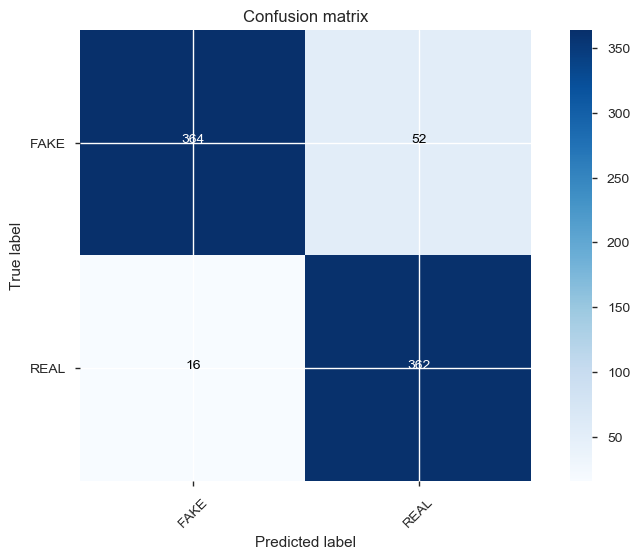

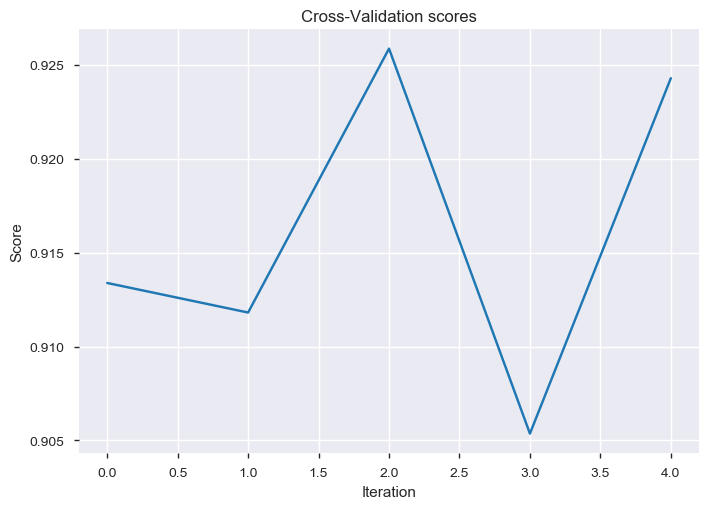

Accuracy::[0.91338583 0.91181102 0.92586751 0.90536278 0.92429022]
Mean Accuracy::0.9161434710251125


In [198]:
# Classification Report
print(classification_report(y_test, svmL_clf_pipe_lemma_pred))

# Confusion Matrix
cm_svmL_pipe_lemma = confusion_matrix(y_test, svmL_clf_pipe_lemma_pred)
plot_confusion_matrix(cm_svmL_pipe_lemma, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svmL_clf_pipe_lemma_pred))

# Plotting cross validation scores
fig, ax = plt.subplots()
ax.plot(range(0, 5), svmL_clf_pipe_lemma_scores)
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
ax.set_title("Cross-Validation scores")
plt.show()
print("Accuracy::{}".format(svmL_clf_pipe_lemma_scores))
print("Mean Accuracy::{}".format(svmL_clf_pipe_lemma_accuracy.mean()))

#### Grid Search

In [199]:
parameters_svmL_lemma = {
    "vect__ngram_range": [(1, 4), (1, 6), (1, 8)],
    "tfidf__use_idf": (True, False)
}

svmL_clf_pipe_lemma_gridsearch = GridSearchCV(svmL_clf_pipe_lemma, parameters_svmL_lemma, n_jobs=-1)
svmL_clf_pipe_lemma_gridsearch = svmL_clf_pipe_lemma_gridsearch.fit(X_train, y_train)

print(svmL_clf_pipe_lemma_gridsearch.best_score_)
print(svmL_clf_pipe_lemma_gridsearch.best_params_)

0.9227616645649432
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 4)}


In [200]:
svmL_clf_pipe_lemma_gridsearch_prediction = svmL_clf_pipe_lemma_gridsearch.predict(X_test)
svmL_clf_pipe_lemma_gridsearch_acc = metrics.accuracy_score(y_test, svmL_clf_pipe_lemma_gridsearch_prediction)
print("NB accuracy on the test set: %0.3f" % svmL_clf_pipe_lemma_gridsearch_acc)

result15 = cross_val_score(svmL_clf_pipe_lemma_gridsearch, X_train, y_train, scoring="accuracy", cv=5).mean()
print("NB cross-validation accuracy: %0.3f" % result15)

NB accuracy on the test set: 0.928
NB cross-validation accuracy: 0.927


              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93       416
        REAL       0.91      0.94      0.93       378

   micro avg       0.93      0.93      0.93       794
   macro avg       0.93      0.93      0.93       794
weighted avg       0.93      0.93      0.93       794

Confusion matrix, without normalization
Accuracy Score on Test: 0.9282115869017632


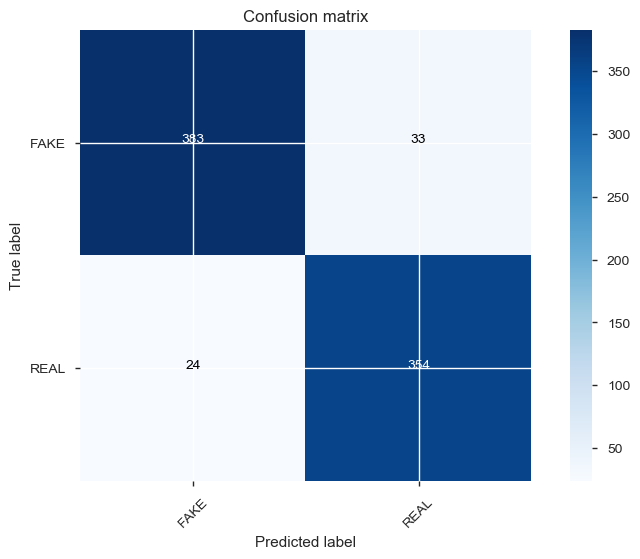

In [201]:
# Classification Report
print(classification_report(y_test, svmL_clf_pipe_lemma_gridsearch_prediction))

# Confusion Matrix
cm_svmL_pipe_lemma = confusion_matrix(y_test, svmL_clf_pipe_lemma_gridsearch_prediction)
plot_confusion_matrix(cm_svmL_pipe_lemma, classes=['FAKE', 'REAL'])

# Accuracy 
print('Accuracy Score on Test:', accuracy_score(y_test, svmL_clf_pipe_lemma_gridsearch_prediction))

### 5 Conclusion

As previously illustrated, different models were implemented and generally performed well in classification in terms of accuracy. We have tried using bag of words through count vectorizer and weighting the words through tfidf. We implemented Logistic Regression, Naive Bayes, and SVM classifiers with different standards and many models performed really well however Linear SVM classifier has the best accuracy of 94 % after performing grid search. As previously notice, stemming was put on trial with Naive Bayes however did not improve the accuracy. Lemmatization was also implemented and used with Naive Bayes as well as with Linear SVM showing accuracy of 92.8%, however the best classifier remains the same. Therefore we will use Linear SVM with our final prediction.

Since we don't have labels for the test set and consequently can't test the accuracy, both models will be used to predict the outcome.

### 6 Predicting Test Set

In [154]:
# Predict test set
final_prediction = svmL_clf_pipe.predict(df_test.text)
print(final_prediction)

['FAKE' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [155]:
df_test['prediction'] = final_prediction

In [157]:
# Writing prediction file
df_test.to_csv(r'C:/Users/andre/Desktop/Files/MBD Term 3/NLP/First Assignment - Fake News/prediction.csv')

### 7 References

- https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
- https://scikit-learn.org/stable/modules/linear_model.html
- http://billchambers.me/tutorials/2015/01/14/python-nlp-cheatsheet-nltk-scikit-learn.html
- https://www.nltk.org/book/ch06.html
- https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8